In [12]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

In [13]:
with nengo.Network() as model:
    ens_A = nengo.Ensemble(n_neurons=101, dimensions=1, seed=5891)
    ens_B = nengo.Ensemble(n_neurons=102, dimensions=1, seed=7123)

    con = nengo.Connection(ens_A, ens_B)

with nengo.Simulator(model) as sim:
    aDT = sim.data[con].weights # This will be alpha * D * T
    E = sim.data[ens_B].encoders

W = E @ aDT # 102 x 101 matrix

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [14]:
with nengo.Network() as model:
    nd_in = nengo.Node(nengo.processes.WhiteSignal(period=10.0, rms=0.5, high=2.0))
    ens_A = nengo.Ensemble(n_neurons=101, dimensions=1, seed=5891)
    ens_B = nengo.Ensemble(n_neurons=102, dimensions=1, seed=7123)

    nengo.Connection(nd_in, ens_A)
    nengo.Connection(ens_A.neurons, ens_B.neurons, transform=W)

    p_A = nengo.Probe(ens_A, synapse=10.0e-3)
    p_B = nengo.Probe(ens_B, synapse=10.0e-3)

with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

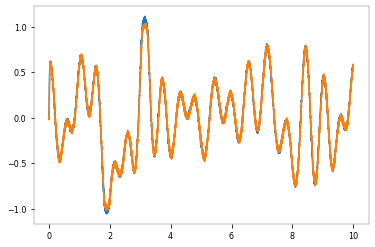

In [15]:
fig, ax = plt.subplots()
ts = sim.trange()
ax.plot(ts, sim.data[p_A])
ax.plot(ts, sim.data[p_B])